In [10]:
import warnings
warnings.simplefilter('ignore')
from os import system
system("pip install vaderSentiment")


1

In [11]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

ModuleNotFoundError: No module named 'vaderSentiment'

In [ ]:
reviewsDF = pd.read_csv("Reviews.csv.gz")
reviewsDF = reviewsDF.dropna()
userReviews = reviewsDF['comments'].tolist()

In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
%%time
reviewsDF['negative']=0.0
reviewsDF['positive']=0.0
reviewsDF['neutral']=0.0
reviewsDF['compound']=0.0
for index,row in reviewsDF.iterrows():
    ss = analyser.polarity_scores(row['comments'])
    reviewsDF.set_value(index,'negative',ss['neg'])
    reviewsDF.set_value(index,'positive',ss['pos'])
    reviewsDF.set_value(index,'neutral',ss['neu'])
    reviewsDF.set_value(index,'compound',ss['compound'])
reviewsDF.head()

In [8]:
%%time
for index,row in reviewsDF.iterrows():
    if row['compound'] >= 0.05:
        sentiment = "Positive"
    elif row['compound'] <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    reviewsDF.set_value(index,'sentiment',sentiment)
reviewsDF.head()

KeyError: 'compound'

In [38]:
reviewsSentimentDF = reviewsDF.copy(deep=True)

In [39]:
reviewsSentimentDF = reviewsSentimentDF.dropna()

In [40]:
reviewsSentimentDF.to_csv('sentiment_Values_reviews_Boston.csv')


In [41]:
reviewsSentimentDF['sentiment'].value_counts()

Positive    183544
Neutral      10363
Negative      5335
Name: sentiment, dtype: int64

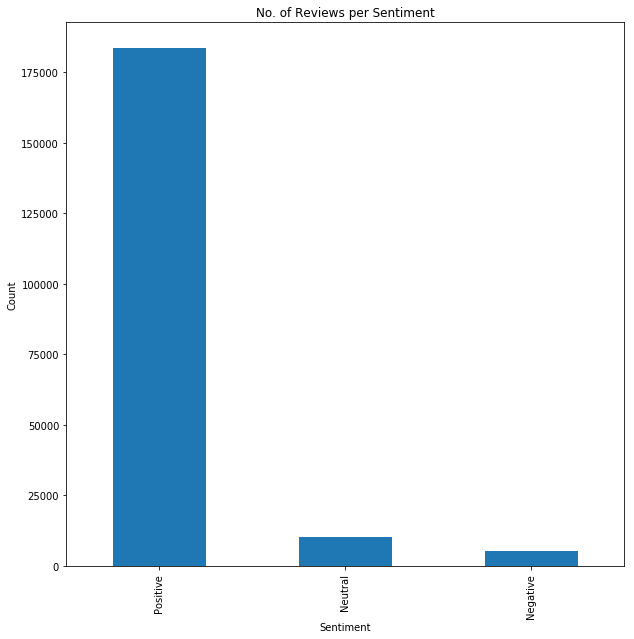

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
reviewsSentimentDF['sentiment'].value_counts().plot(kind='bar')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("No. of Reviews per Sentiment")
plt.savefig('sentiment_count_boston.png')
plt.show()

In [43]:
import numpy as np

# Lets visualize polarity score for positivity

polarDF=reviewsSentimentDF[['positive']].astype('float64')
polarDF=polarDF.groupby(pd.cut(polarDF["positive"], np.arange(0, 1.1, 0.1))).count()
polarDF=polarDF.rename(columns={'positive':'count_of_Comments'})
polarDF=polarDF.reset_index()
polarDF=polarDF.rename(columns={'positive':'range_i'})
for i,r in polarDF.iterrows():
    polarDF.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDF.set_value(i,'Sentiment','positive')
del polarDF['range_i']
polarDF.head()

,count_of_Comments,RANGE,Sentiment
0,6892,0.0,positive
1,29422,0.1,positive
2,49795,0.2,positive
3,42911,0.3,positive
4,26004,0.4,positive


In [44]:
# Lets visualize polarity score for negativity

polarDFneg=reviewsSentimentDF[['negative']].astype('float64')
polarDFneg=polarDFneg.groupby(pd.cut(polarDFneg["negative"], np.arange(0, 1.1, 0.1))).count()
polarDFneg=polarDFneg.rename(columns={'negative':'count_of_Comments'})
polarDFneg=polarDFneg.reset_index()
polarDFneg=polarDFneg.rename(columns={'negative':'range_i'})
for i,r in polarDFneg.iterrows():
    polarDFneg.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFneg.set_value(i,'Sentiment','negative')
del polarDFneg['range_i']
for i,r in polarDFneg.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneg.head()

,count_of_Comments,RANGE,Sentiment
0,42144,0.0,negative
1,5285,0.1,negative
2,948,0.2,negative
3,269,0.3,negative
4,82,0.4,negative


In [45]:
# Lets visualize polarity score for neutrality

polarDFnut=reviewsSentimentDF[['neutral']].astype('float64')
polarDFnut=polarDFnut.groupby(pd.cut(polarDFnut["neutral"], np.arange(0, 1.0, 0.1))).count()
polarDFnut=polarDFnut.rename(columns={'neutral':'count_of_Comments'})
polarDFnut=polarDFnut.reset_index()
polarDFnut=polarDFnut.rename(columns={'neutral':'range_i'})
for i,r in polarDFnut.iterrows():
    polarDFnut.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFnut.set_value(i,'Sentiment','neutral')
del polarDFnut['range_i']

for i,r in polarDFnut.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFnut.head()

,count_of_Comments,RANGE,Sentiment
0,123,0.0,neutral
1,3240,0.1,neutral
2,5365,0.2,neutral
3,8055,0.3,neutral
4,15651,0.4,neutral


<Figure size 720x720 with 0 Axes>

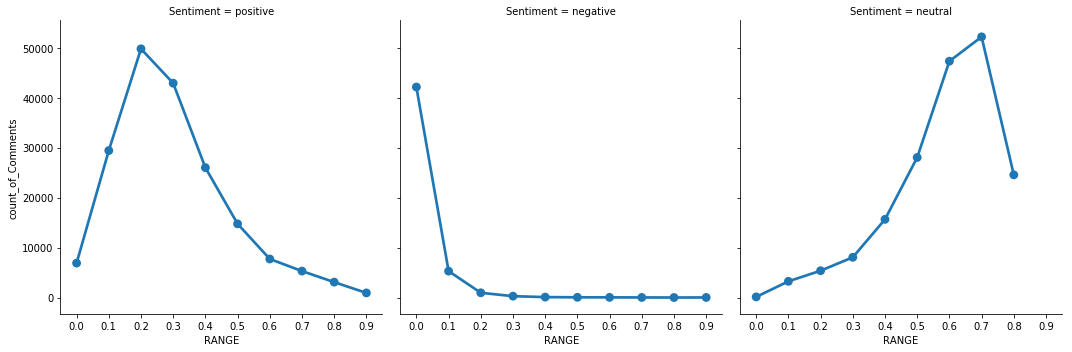

In [46]:
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.factorplot(data=polarDF, x="RANGE", y="count_of_Comments",col="Sentiment")
plt.savefig('sentiment_factorGraph_boston.png')

In [25]:
comments = " ".join(review for review in reviewsSentimentDF.comments)
print ("There are {} words in the combination of all review.".format(len(comments)))

There are 105865724 words in the combination of all review.


In [26]:
import numpy as np
from PIL import Image
home_mask = np.array(Image.open("Home.png"))

In [27]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
# Transform your mask into a new one that will work with the function:
transformed_home_mask = np.ndarray((home_mask.shape[0],home_mask.shape[1]), np.int32)

for i in range(len(home_mask)):
    transformed_home_mask[i] = list(map(transform_format, home_mask[i]))


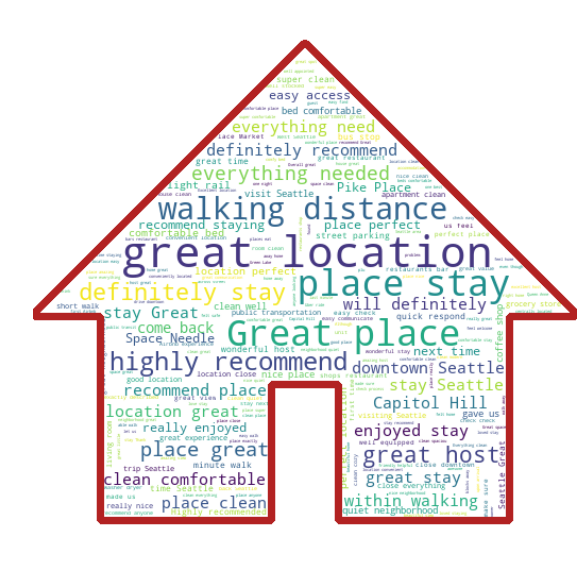

CPU times: user 1min 4s, sys: 10.6 s, total: 1min 14s
Wall time: 1min 27s


In [28]:
%%time
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create a word cloud image
wc = WordCloud(background_color="white", mask=transformed_home_mask, contour_width=10, contour_color='firebrick')

# Generate a wordcloud
wc.generate(comments)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('house_wordCloud_boston.png')
plt.show()
